### Libraries

In [1]:
import pandas as pd
import sklearn
import numpy as np

Reading dataframes

In [2]:
df_wowtoken = pd.read_csv('df_wowtoken.csv')
df_currency = pd.read_csv('df_currency.csv')

Drop ```Unnamed: 0``` column

In [3]:
df_wowtoken.drop('Unnamed: 0', axis=1, inplace=True)
df_currency.drop('Unnamed: 0', axis=1, inplace=True)

Converting date to datetime

In [4]:
df_wowtoken['date'] = pd.to_datetime(df_wowtoken['date'], infer_datetime_format=True)
df_currency['date'] = pd.to_datetime(df_currency['date'], infer_datetime_format=True)

## Simple visualization

In [5]:
from sklearn.preprocessing import MinMaxScaler
amount = 10

y1 = np.array(df_wowtoken['Eu'][-amount:]).reshape(amount,-1)
y2 = np.array(df_currency['Eur'][-amount:]).reshape(amount,-1)

sc = MinMaxScaler()
y1_sc = sc.fit_transform(y1)
y2_sc = sc.fit_transform(y2)

# SEPARAR POR DIA AS DATAS

df = pd.DataFrame(data=(y1_sc.flatten(),y2_sc.flatten())).T
df['wowtoken'] = df[0]
df['currency'] = df[1]
df.reset_index(inplace=True)
df.drop(columns=['index', 0, 1], axis=1, inplace=True)

## Linear Regression

In [6]:
from sklearn.linear_model import LinearRegression

n_samples = 10
n_predict = 10

y = np.array(df_wowtoken['Eu'][:n_samples])
x = np.arange(n_samples).reshape(n_samples, -1)

df = pd.DataFrame(data=y, columns=['wowtoken'])

reg = LinearRegression().fit(x,df['wowtoken'])

In [7]:
print('score: ',reg.score(x,y))
print('coef:  ',reg.coef_[0])

score:  0.7083179937189596
coef:   0.19944242424241992


In [8]:
df

,wowtoken
0,177.184
1,176.847
2,176.893
3,176.819
4,176.819
5,177.021
6,177.840
7,178.365
8,178.436
9,178.424


In [9]:
a_predict = np.arange(n_samples, n_samples+n_predict).reshape(n_predict, -1)
v_predict = reg.predict(a_predict)
type(v_predict)
#pd.concat([df['wowtoken'], pd.Series(v_predict)])

numpy.ndarray

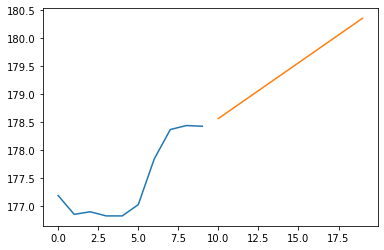

In [11]:
from matplotlib import pyplot as plt
plt.plot(df)
plt.plot(a_predict, v_predict)

## Support Vector Machine

In [ ]:
from sklearn import svm
n_samples = np.array(df_wowtoken['Eu'][:10])
n_features = np.array(df_wowtoken['date'][:10])

x = n_samples.reshape(len(n_samples), -1)
#y = n_features.reshape(len(n_features), -1)
y = np.array([0,1,1,1,1,0,0,0,0,0])

clf = svm.SVC()
clf.fit(x, y)
clf.support_vectors_

In [ ]:
new = 176.847
clf.predict([[new]])

Exemplo

In [ ]:
x = np.array([[-1, -1], [-2, -1], [1, 1], [2, 1]])
y = np.array([1, 1, 2, 2])

clf2 = svm.SVC()
clf2.fit(x,y)
clf2.support_vectors_

## Prophet (nao tentei ainda)

In [ ]:
import pandas as pd
from fbprophet import Prophet